# Assignment 4 - Homography

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from random import randrange

In [0]:
img_ = cv2.imread('right.jpeg')
img1 = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
img = cv2.imread('left.jpeg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'Left')

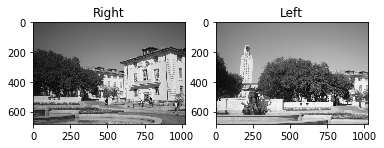

In [41]:
plt.subplot(121); plt.imshow(img1, cmap = 'gray'); plt.title('Right')
plt.subplot(122); plt.imshow(img2, cmap = 'gray'); plt.title('Left')

In [0]:
 sift = cv2.xfeatures2d.SIFT_create()

In [0]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [0]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [0]:
# Apply ratio test
good = []
for m in matches:
     if m[0].distance < 0.5*m[1].distance:         
     	good.append(m)
matches = np.asarray(good)

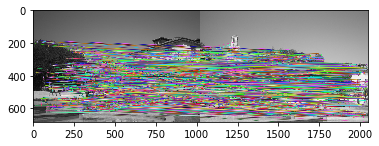

In [46]:
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
plt.imshow(img3)

In [47]:
if len(matches[:,0]) >= 4:
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
    print("Homography Matrix\n", H)
else:
    raise AssertionError("Can't find enough keypoints.")

Homography Matrix
 [[ 7.66686044e-01  3.55999704e-02  4.46914709e+02]
 [-1.34919198e-01  9.11110569e-01  7.62161878e+01]
 [-2.09455818e-04 -3.38890427e-05  1.00000000e+00]]


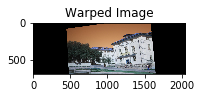

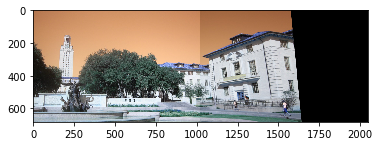

In [48]:
dst = cv2.warpPerspective(img_,H,(img.shape[1] + img_.shape[1], img.shape[0]))
plt.subplot(122),plt.imshow(dst),plt.title('Warped Image')
plt.show()
plt.figure()
dst[0:img.shape[0], 0:img.shape[1]] = img
cv2.imwrite('output.jpg',dst)
plt.imshow(dst)
plt.show()

Reference: https://towardsdatascience.com/image-stitching-using-opencv-817779c86a83